
ExtraaLearn Project
Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

- The customer interacts with the marketing front on social media or other online platforms.
- The customer browses the website/app and downloads the brochure
- The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.
Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:

- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
- Find the factors driving the lead conversion process
- Create a profile of the leads which are likely to convert

Data Description

- The data contains the different attributes of leads and their interaction details with ExtraaLearn. - The detailed data dictionary is given below.

Data Dictionary

- ID: ID of the lead

- age: Age of the lead

- current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'

- first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'

- profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)

- website_visits: How many times has a lead visited the website

- time_spent_on_website: Total time spent on the website

- page_views_per_visit: Average number of pages on the website viewed during the visits.

- last_activity: Last interaction between the lead and ExtraaLearn.
    Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    Website Activity: Interacted on live chat with representative, Updated profile on website, etc

- print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.

- print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.

- digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.

- educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.

- referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.

- status: Flag indicating whether the lead was converted to a paid customer or not.



### Importing necessary librairies

In [3]:
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from google.auth.transport.requests import Request
import os.path
import pickle

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/drive.file']

def get_google_drive_service():
    creds = None
    # The file token.pickle stores the user's access and refresh tokens
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
            
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
            
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    # Return Google Drive API service
    return build('drive', 'v3', credentials=creds)

# Create Drive API service
service = get_google_drive_service()

ModuleNotFoundError: No module named 'google'

In [ ]:
from google.colab import drive
drive.mount('content/drive')

In [ ]:
print("Current working directory:", os.getcwd())  # Let's first check where we are

Current working directory: /home/hounfodji/me/projects/potential_customers_prediction


In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Enable graphical display  to display plots and figures directly in the notebook.
%matplotlib inline

# To build models for prediction
from sklearn.model_selection import train_test_split
from sklearn import tree

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, recall_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### Import dataset

In [5]:
# read the data
data = pd.read_csv("ExtraaLearn.csv")
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [6]:
# copying data to another variable to avoid any changes to the original data
df = data.copy()

### Data Overview

In [7]:
# return the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [8]:
# view the last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [9]:
# Understand the shape of the data
df.shape

(4612, 15)

### Observations
    - The dataset has 4612 rows and 15 columns

### Checking the info

In [10]:
# Method to check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Observations
- age, website_visits, time_spent_on_website, page_views_per_visit and status are of numeric type and the rest of the columns are of object type. Will have to create dummy encoding for object columns of the model. 
- The number of non-null values is 4612, that is same as the total number of entries in the data, i.e., they are no null values.
- The column ID is an iidentifier for lead in the data. This column will not help with our analysis so we can drop it later.

In [11]:
# checking for duplicate values
df.duplicated().sum()

0

#### Observations:
Data contains unique rows. There is no need to remove any rows.

### Exploratory Data Analysis (EDA)

### Summary Statistics

#### Numerical variables


In [12]:
# checking the descriptive statistics of the columns
numerical_col = df.select_dtypes('number').columns
df[numerical_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


#### Observations
- age - Average age of the lead is 46 with the youngest being 18 and the oldest being 63. With 50% being around 51 years old.
- website_visits - Average number of visites is 3.5. There is a large gap between 75th percentile and max indicating there could be an outlier.
- time_spent_on_website - Time spent ranges from 0-2537s (0-42min).
- page_views_per_visit - Average page views is 3. There is a large gap between 75th percentile and max indicating there could be an outlier, or or a very pracousious lead.
- status - Over 75% of the leads are not likely to convert

#### Categorical variables

In [13]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes('object').columns)
cat_col

['ID',
 'current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [14]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print(round(100*df[column].value_counts()/len(df), 2))
    print('-' * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
ID
EXT001     0.02
EXT2884    0.02
EXT3080    0.02
EXT3079    0.02
EXT3078    0.02
           ... 
EXT1537    0.02
EXT1536    0.02
EXT1535    0.02
EXT1534    0.02
EXT4612    0.02
Name: count, Length: 4612, dtype: float64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
current_occupation
Professional    56.72
Unemployed      31.24
Student         12.03
Name: count, dtype: float64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
first_interaction
Website       55.12
Mobile App    44.88
Name: count, dtype: float64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low

#### Observations 
- Most of the leads are working professionals that is 2616.
- The majority 55,12% of the leads interacted with ExtraaLearn from the website.
- Almost an equal percentage of profile completions are categorized as high and medium that is 49.1% and 48/59% respectively. Only 2.3% of the profile completions are categorized as low.
- Approx 49.4% of the leads had their last activity over email, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email. * It is observable that each ID has an equal percentage of values. Let's check the number of unique values in the ID column.

In [15]:
# checking the number of unique values
df["ID"].nunique()

4612

- As expected, all the values in the ID column are unique. We can drop this column as it would not add value to our analysis.

In [16]:
# dropping ID column
df.drop(["ID"], axis=1, inplace=True)

#### Univariable Analysis

#### Observation on Status



In [21]:
%matplotlib inline

Rectangle(xy=(0.6, 0), width=0.8, height=1377, angle=0)


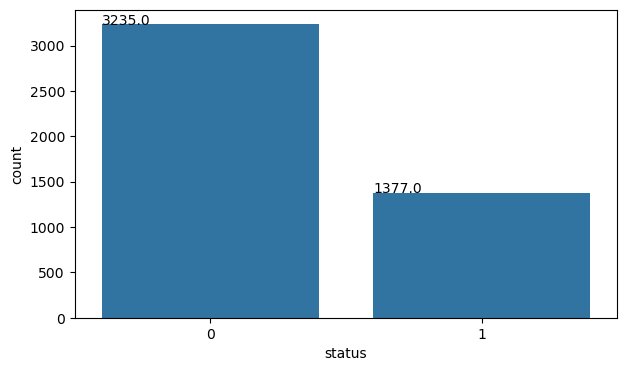

In [27]:
plt.figure(figsize=(7,4))

plots = sns.countplot(x = 'status', data=df)

# Annotating the exact count on the top of the bar for each category
for p in plots.patches:
    plots.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

print(p)
plt.show()

- The above plot shows that number of leads converted are significantly less than number of leads not converted.
- The plot indicates that ~30% (1377/4612) of leads have been converted.

### Distribution and ouliers for numerical columns in the data


age
Skew : -0.72


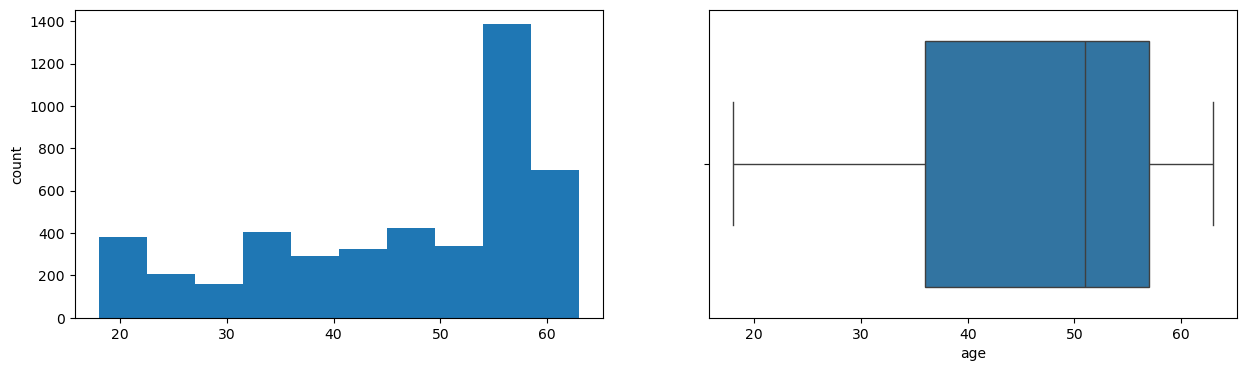

website_visits
Skew : 2.16


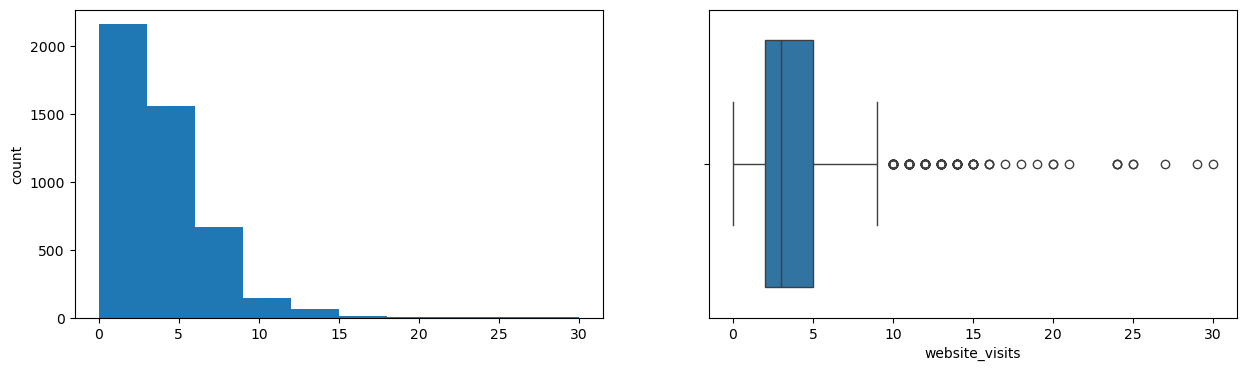

time_spent_on_website
Skew : 0.95


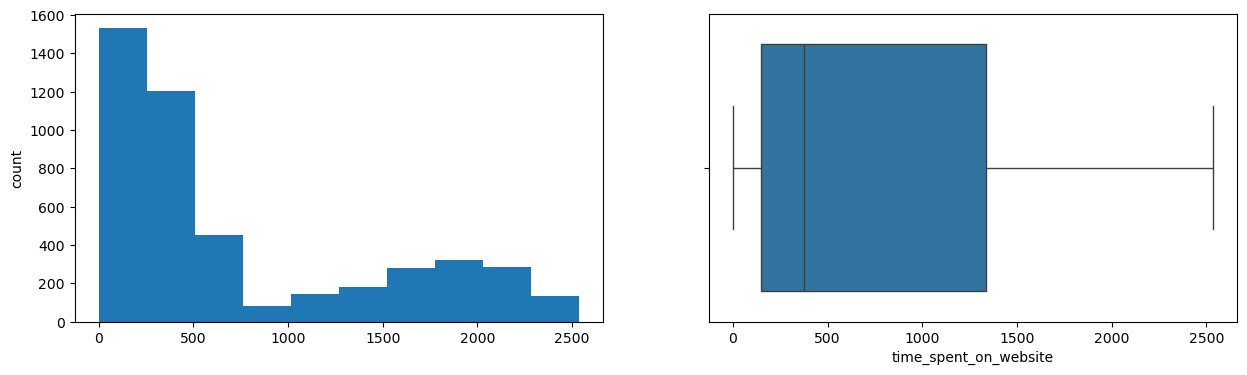

page_views_per_visit
Skew : 1.27


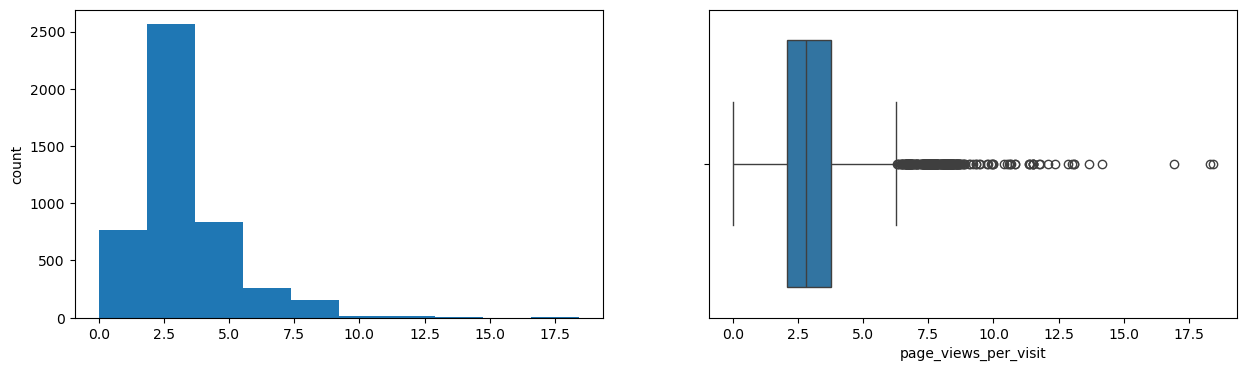

In [31]:
for feature in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(feature)
    
    print('Skew :', round(df[feature].skew(), 2))
    
    plt.figure(figsize= (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[feature].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = df[feature])
    
    plt.show()